## Geladeiras

Empresa precisa decidir quais modelos de geladeira instalar em sua nova planta. São dois possíveis modelos: luxo e básico.

No máximo, 1500 unidades do modelo luxo e 6000 unidades do modelo básico podem ser vendidas por mês.

Empresa contratou 25000 homens-hora de trabalho por mês;

Os modelos luxos precisam de 10 homens-hora de trabalho para serem produzidos e os modelos básicos, 8 homens-hora.

A capacidade da linha de montagem é de 4500 geladeiras por mês, pois as geladeiras dividem a mesma linha;

O lucro unitário do modelo luxo é 100,00 Reais por mês, enquanto o modelo básico lucra 50,00 Reais durante o mesmo período.

Determine quanto produzir de cada geladeira, de modo a satisfazer todas as restrições e maximizar o lucro da empresa.

x1 = quantidade de geladeiras do modelo luxo a ser produzida por mês.

x2 = quantidade de geladeiras do modelo básico a ser produzida por mês

max 100x1 + 50x2

10x1 + 8x2 <= 25000

x1 + x2 <= 4500

x1 <= 1500

x2 <= 6000

x1, x2 >= 0

In [1]:
from docplex.mp.model import Model
import cplex

m = Model(name='Geladeiras')

variaveis = dict()

for i in range(1,3):
    variaveis[i] = m.continuous_var(name='x_{0}'.format(i))
    
m.add_constraint(10*variaveis[1] + 8*variaveis[2] <= 25000)
m.add_constraint(variaveis[1] + variaveis[2] <= 4500)
m.add_constraint(variaveis[1] <= 1500)
m.add_constraint(variaveis[2] <= 6000)

for i in range(1,3):
    m.add_constraint(variaveis[i]>=0)

m.maximize(100*variaveis[1] + 50*variaveis[2])

m.solve()
print(m.solution)

solution for: Geladeiras
objective: 212500
x_1=1500.000
x_2=1250.000



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

In [2]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

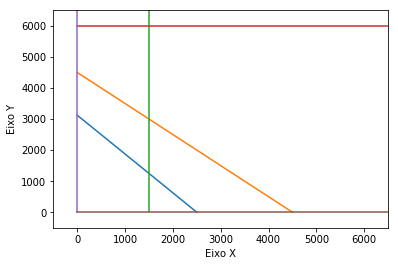

In [3]:
plt.plot([0, 2500], [3125, 0]) # 10x1 + 8x2 <= 25000
plt.plot([0, 4500], [4500, 0]) # x1 + x2 <= 4500
plt.plot([1500, 1500], [0, 6500]) # x1 <= 1500
plt.plot([0, 6500], [6000, 6000]) # x2 <= 6000

plt.plot([0, 0], [0, 6500]) # x2 >= 0
plt.plot([0, 6500], [0, 0]) # x1 >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-500, 6500, -500, 6500]) # [xmin, xmax, ymin, ymax]

plt.show()

**Forma padrão:**

x1 = quantidade de geladeiras do modelo luxo a ser produzida por mês.

x2 = quantidade de geladeiras do modelo básico a ser produzida por mês

max 100x1 + 50x2

10x1 + 8x2 <= 25000

x1 + x2 <= 4500

x1 <= 1500

x2 <= 6000

x1, x2 >= 0

In [4]:
# Informar aqui os valores da matriz A
A = np.array([[10, 8, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [1, 0, 0, 0, 1, 0],
              [0, 1, 0, 0, 0, 1]])

In [5]:
# Informar aqui os valores da matriz b
b = np.array([[25000], 
              [4500], 
              [1500],
              [6000]])

In [6]:
# Informar aqui os valores do vetor c
c = np.array([100, 50, 0, 0, 0, 0])

In [7]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

m: 4
n: 6
O número máximo de soluções básicas: 15


In [8]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [9]:
solucoes_viaveis = np.array([[0, 0, 0, 0], 0, 0, 0])
todas_solucoes = np.array([[0, 0, 0, 0], 0, 0, 0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
        for z in range(y+1, n):
            for j in range(z+1, n):
            
                # Id da solução
                cont_x = cont_x + 1;
                print('\nx', cont_x)

                # Conjunto de índices IB
                IB = [w,y,z,j]
                print('IB =', IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1)

                # B
                B = np.array([A[0][w], A[0][y], A[0][z], A[0][j]])
                for v in range (1, m):
                    B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z], A[v][j]]))
                print('B =', B, '\n')

                # Verificando se B é uma base
                v, V =  np.linalg.eig(B)

                if(v.all() == 0):

                    print('A matriz B não é uma base')
                    print('A linha LD é:')
                    print (B[v == 0,:])
                    print('\n---------------------------------------------------------------------------\n')

                    # Colocar na tabela de soluções básicas, com informações vazias
                    todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, [], []]))
                    #continue

                # B-1
                try:
                    B1 = np.linalg.inv(B)
                    print('B-1 =', B1, '\n')
                except:
                    print("B-1 não existe")
                    todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, [], []]))
                    print('\n---------------------------------------------------------------------------\n')
                    continue

                # xB
                xB = B1.dot(b)
                print('xB =', xB, '\n')

                # x
                x = []
                for v in range (0, n):              
                    if(v == IB[0]):
                        x.append(round(xB[0],3))
                    elif(v == IB[1]):
                        x.append(round(xB[1],3))
                    elif(v == IB[2]):
                        x.append(round(xB[2],3))
                    elif(v == IB[3]):
                        x.append(round(xB[3],3))
                    else:
                        x.append(0)
                print('x =', x, '\n')

                # cTx
                cTx = np.transpose(c).dot(x)
                print('cTx =', cTx, '\n')

                # Colocar na tabela de soluções básicas
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, cTx, x]))

                # Se a solução for viável, colocar na tabela de soluções viáveis
                if(verifica_solucao_viavel(x) == True):
                    solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, cTx, x]))

                print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2 3 4
B = [[10  8  1  0]
 [ 1  1  0  1]
 [ 1  0  0  0]
 [ 0  1  0  0]] 

B-1 = [[  0.   0.   1.   0.]
 [  0.   0.   0.   1.]
 [  1.  -0. -10.  -8.]
 [  0.   1.  -1.  -1.]] 

xB = [[  1500.]
 [  6000.]
 [-38000.]
 [ -3000.]] 

x = [1500.0, 6000.0, -38000.0, -3000.0, 0, 0] 

cTx = 450000.0 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 3 5
B = [[10  8  1  0]
 [ 1  1  0  0]
 [ 1  0  0  1]
 [ 0  1  0  0]] 

B-1 = [[  0.   1.   0.  -1.]
 [  0.   0.   0.   1.]
 [  1. -10.  -0.   2.]
 [ -0.  -1.   1.   1.]] 

xB = [[-1500.]
 [ 6000.]
 [-8000.]
 [ 3000.]] 

x = [-1500.0, 6000.0, -8000.0, 0, 3000.0, 0] 

cTx = 150000.0 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 3 6
B = [[10  8  1  0]
 [ 1  1  0  0]
 [ 1  0  0  0]
 [ 0  1  0  1]] 

B-1 = [[ 0.  0.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 1. -8. -2. -0.]
 [-0. -1.  1.  1.]] 


In [10]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base']).sort_values(by=['Id da solução'])
todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3, 4]",1,450000,"[1500.0, 6000.0, -38000.0, -3000.0, 0, 0]"
1,"[1, 2, 3, 5]",2,150000,"[-1500.0, 6000.0, -8000.0, 0, 3000.0, 0]"
2,"[1, 2, 3, 6]",3,300000,"[1500.0, 3000.0, -14000.0, 0, 0, 3000.0]"
3,"[1, 2, 4, 5]",4,70000,"[-2300.0, 6000.0, 0, 800.0, 3800.0, 0]"
4,"[1, 2, 4, 6]",5,212500,"[1500.0, 1250.0, 0, 1750.0, 0, 4750.0]"
5,"[1, 2, 5, 6]",6,-50000,"[-5500.0, 10000.0, 0, 0, 7000.0, -4000.0]"
6,"[1, 3, 4, 5]",7,[],[]
7,"[1, 3, 4, 5]",7,[],[]
8,"[1, 3, 4, 6]",8,150000,"[1500.0, 0, 10000.0, 3000.0, 0, 6000.0]"
9,"[1, 3, 5, 6]",9,450000,"[4500.0, 0, -20000.0, 0, -3000.0, 6000.0]"


In [11]:
qtd_solucoes_basicas = map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx']).count(1)

print(qtd_solucoes_basicas)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)

13

Quantidade de soluções básicas:  13


/home/myllah/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.


In [12]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base']).sort_values(by=['Id da solução'])
solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 4, 6]",5,212500,"[1500.0, 1250.0, 0, 1750.0, 0, 4750.0]"
1,"[1, 3, 4, 6]",8,150000,"[1500.0, 0, 10000.0, 3000.0, 0, 6000.0]"
2,"[2, 4, 5, 6]",14,156250,"[0, 3125.0, 0, 1375.0, 1500.0, 2875.0]"
3,"[3, 4, 5, 6]",15,0,"[0, 0, 25000.0, 4500.0, 1500.0, 6000.0]"


In [13]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  4


In [14]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 1

if(entrada == 1):
    solucao_otima = solucoes_viaveis['cTx'].max(axis=0)
elif(entrada == 2):
    solucao_otima = solucoes_viaveis['cTx'].min(axis=0)
print('Solução Ótima:', solucao_otima)

Solução Ótima: 212500.0


In [15]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 4, 6]",5,212500,"[1500.0, 1250.0, 0, 1750.0, 0, 4750.0]"


In [16]:
pontos_extremos = 4

print('\nO número máximo de soluções básicas:', combinacoes)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print('\nPontos Extremos:', pontos_extremos)

print('\nSolução Ótima:', solucao_otima)


O número máximo de soluções básicas: 15

Quantidade de soluções básicas:  13

Quantidade de soluções viáveis:  4

Pontos Extremos: 4

Solução Ótima: 212500.0
